## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

## Helper Functions - For plotting 

In [2]:
#to visualize the decision tree of scikit learn model
from util import visualize_tree_boundries

In [3]:
def plot2D(
    X,
    y=None,
    feature_names=['Length(cm)', 'Weight(kg)'],
    target_names=['diamondfin', 'bubblefish', 'crosstail'],
    title=None,
    vertical_boundry=0,
    horizontal_boundry=0
):
    """
    Plots a 2D scatter of two features, supporting both NumPy arrays and Pandas DataFrames.

    Parameters
    ----------
    X : np.ndarray or pd.DataFrame
        Feature matrix with at least two columns.
    y : np.ndarray, pd.Series, or None
        Target labels (optional).
    feature_names : list of str
        Names of the two features to display on axes.
    target_names : list of str
        Labels for each target class.
    title : str or None
        Plot title.
    vertical_boundry : float
        Position of vertical decision boundary.
    horizontal_boundry : float
        Position of horizontal decision boundary.
    """
    
    # Convert X to numpy array if it's a DataFrame
    if isinstance(X, pd.DataFrame):
        X = X.values

    # Convert y to numpy array if it's a Series or DataFrame
    if isinstance(y, (pd.Series, pd.DataFrame)):
        y = np.ravel(y.values)

    colors = ['red', 'blue', 'orange']
    markers = ['d', 'o', 'x']

    plt.figure(figsize=(6, 4))

    if y is None:
        plt.scatter(X[:, 0], X[:, 1])
    else:
        for i, target_name in enumerate(target_names):
            color = colors[i % len(colors)]
            marker = markers[i % len(markers)]
            plt.scatter(
                X[y == i, 0],
                X[y == i, 1],
                label=f"{target_name} - Label {i}",
                color=color,
                marker=marker
            )

    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.legend()

    # Draw vertical boundary (full height)
    plt.axvline(x=vertical_boundry, color='red', linestyle='--')

    # Draw horizontal boundary only to the right of the vertical line
    x_right = plt.xlim()[1]
    plt.hlines(y=horizontal_boundry, xmin=vertical_boundry, xmax=x_right, color='blue', linestyle='--')

    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.tight_layout()
    plt.show()


## 1. Load Data

#### load `data.csv` file with pandas read_csv function

In [4]:
#your code here
df = pd.read_csv("data.csv")

#### Asing the features (`Length(cm)` and	`Weigtht(kg)`) to variable `X` and target to variable `y`

In [5]:
cols = df.columns[:2].tolist()

X = df[cols]
y = df["Label"]

In [6]:
print(X)

     Length(cm)  Weight(kg)
0     44.150353    3.101280
1     37.406146    3.345313
2     46.719283    2.991017
3     48.366514    3.277788
4     58.057526    3.215898
..          ...         ...
263   68.237261    2.258385
264   54.803322    1.954143
265   59.315126    2.221807
266   59.758443    2.684642
267   60.464937    2.779701

[268 rows x 2 columns]


In [7]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
263    0
264    0
265    0
266    0
267    0
Name: Label, Length: 268, dtype: int64


In [8]:
target_names = ['diamondfin', 'bubblefish', 'crosstail']
feature_names = ['Length(cm)', 'Weight(kg)']

## Another illustration of Machine Learning Process



<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week12_DecisionTree/assets/ml_flow.webp" width="400" height="450" />
</div>

### Plot X and y scatter plot 

#### Note: you can use `plot2D` helper function

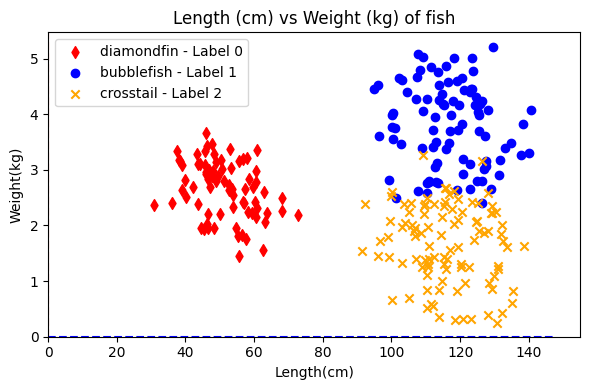

In [9]:
#your code here
plot2D(X, y, feature_names, target_names, "Length (cm) vs Weight (kg) of fish")

## 2. Split Data into Train and Test Sets

In [10]:
#your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3. Design your baseline model 

### What is the accuracy of your random guessing model?

In [11]:
# your answer here
y_random = np.random.randint(0, 3, y.size)

print(accuracy_score(y, y_random)*100)
# A random guessing model has an accuracy score of roughly 1/3 (33%)

38.43283582089552


### Design a better base model with KNN (`n_neighbors=3`)

In [12]:
# your code here
model_base = KNeighborsClassifier(n_neighbors=3)

model_base.fit(X_train, y_train)

y_pred_base = model_base.predict(X_test)

print(accuracy_score(y_test, y_pred_base)*100)  

92.5925925925926


**This is the model you want to beat with your Decision Tree implementation (maybe).**

# 4. Decison Tree From Scratch

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week12_DecisionTree/assets/decisiontree_visual.jpg" width="600" hight="200" /> 

### High level instructions

- ✅ Split data into train and test sets with `test_size=0.3`.
- ✅ Desing KNN classifier to desing your baseline model.
- Plot the **training data** and identify decision boundaries.

    - Use the `plot2D` helper function and decide on `length_threshold` and `weight_threshold` values by looking at the data.

- Display the training data and decision boundaries on the same plot.

    - Use the `plot2D` helper function again, and pass `length_threshold` as `vertical_boundry` and `weight_threshold` as `horizontal_boundry`.

- Write the logic of your decision tree with `if-else` statements.

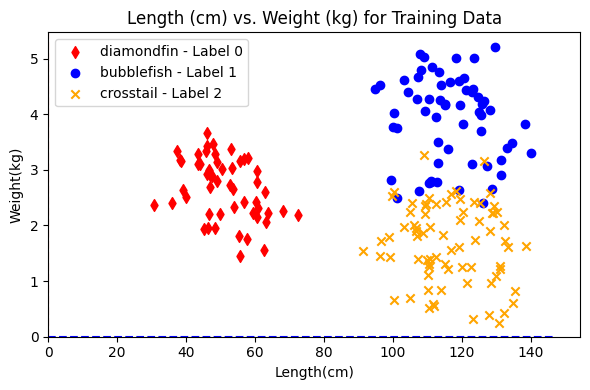

In [13]:
#your code for first plot here
plot2D(X_train, y_train, feature_names, target_names, "Length (cm) vs. Weight (kg) for Training Data")

In [14]:
#your code here 
length_threshold = 80
weight_threshold = 2.6

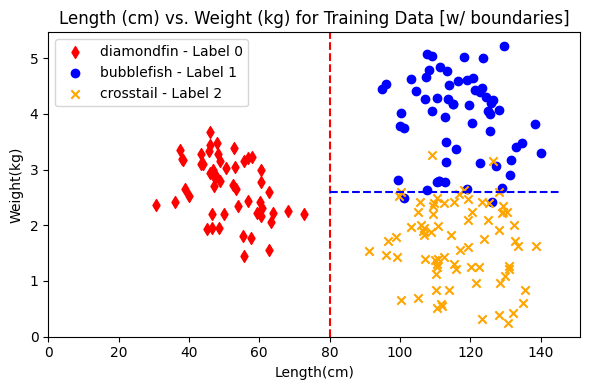

In [15]:
#your code for the second plot here (with vertical and horizontal boundries)
plot2D(X_train, y_train, feature_names, target_names, "Length (cm) vs. Weight (kg) for Training Data [w/ boundaries]", length_threshold, weight_threshold)

In [16]:
#your code here
# Write the logic of your decision tree with `if-else` statements
def my_decision_tree(X_new):
    predictions = []
    # your code here
    for i in range(X_new.shape[0]):
        L = X_new.iloc[i, 0]
        W = X_new.iloc[i, 1]
        p = 0
        if L > length_threshold:
            p = 1
            if W < weight_threshold:
                p = 2
                
        predictions.append(p)

    return np.array(predictions)

## 5. Evaluate your model

#### - Make prediction for the test data using `my_decision_tree` function
#### - `Plot2D` `X_test` once with `y_test` labels and once with `y_pred` labels 

#### Can you see difference especially in overlapping areas?

#### - Calculate the accuracy of your model using `accuracy_score` function from sklearn.metrics

In [17]:
y_pred = my_decision_tree(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f"My Decision Tree Model Accuracy: {accuracy}")   

My Decision Tree Model Accuracy: 0.9629629629629629


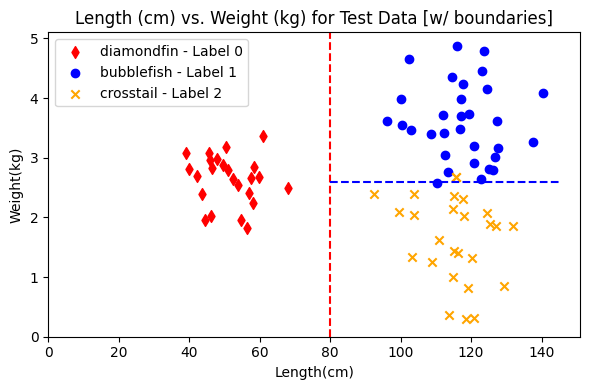

In [19]:
plot2D(X_test, y_test, feature_names, target_names, "Length (cm) vs. Weight (kg) for Test Data [w/ boundaries]", length_threshold, weight_threshold)

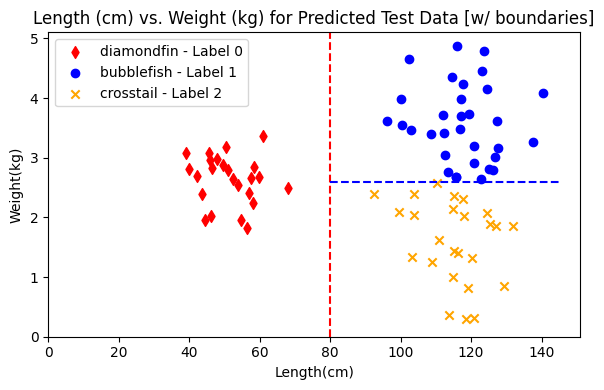

In [20]:
plot2D(X_test, y_pred, feature_names, target_names, "Length (cm) vs. Weight (kg) for Predicted Test Data [w/ boundaries]", length_threshold, weight_threshold)

# 6. Decision Tree with Sklearn

#### Training step

In [21]:
model = DecisionTreeClassifier()
#your code here - train the model with your training data
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


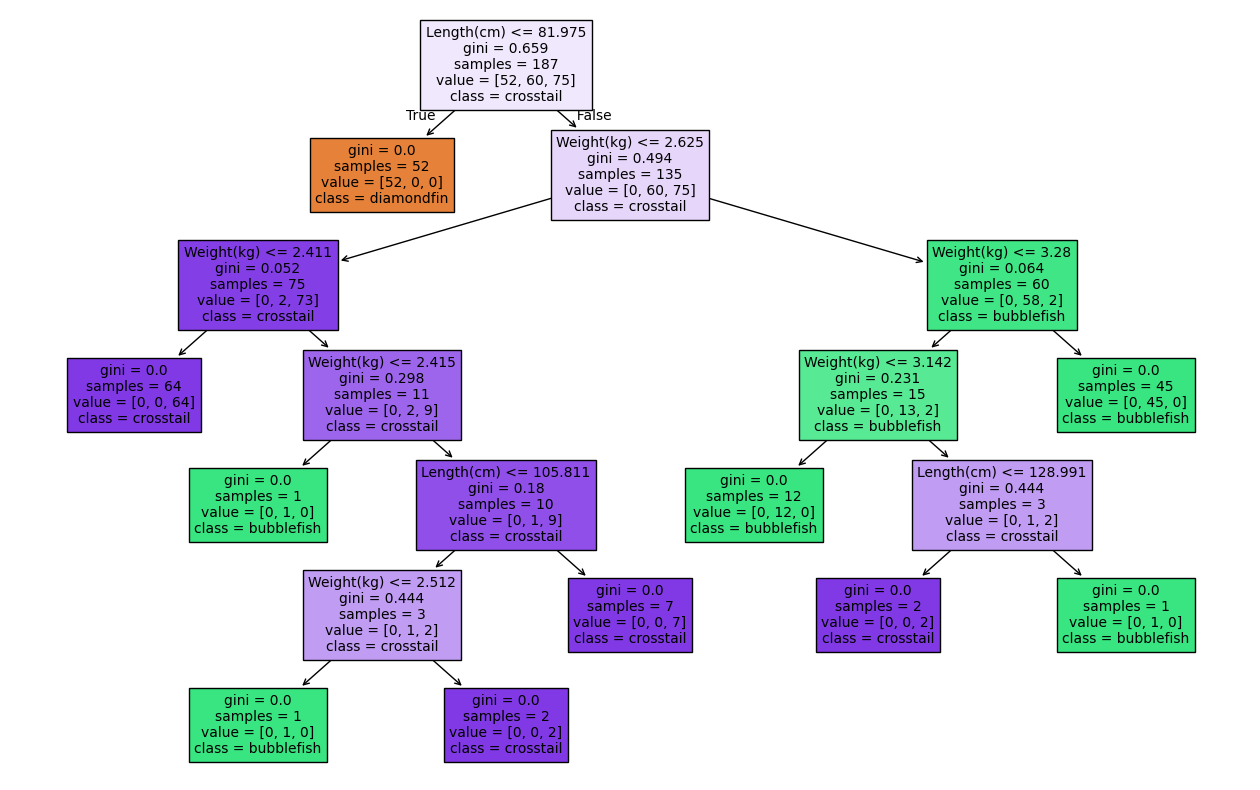

In [22]:
# visualize the tree diagram
plt.figure(figsize=(16,10))
plot_tree(model, filled=True, feature_names=feature_names, class_names=target_names, fontsize=10)
plt.show()

c:\Users\Matth\Documents\PythonProjects\PyData2025\Lab_Week12_DecisionTree\util.py:42: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


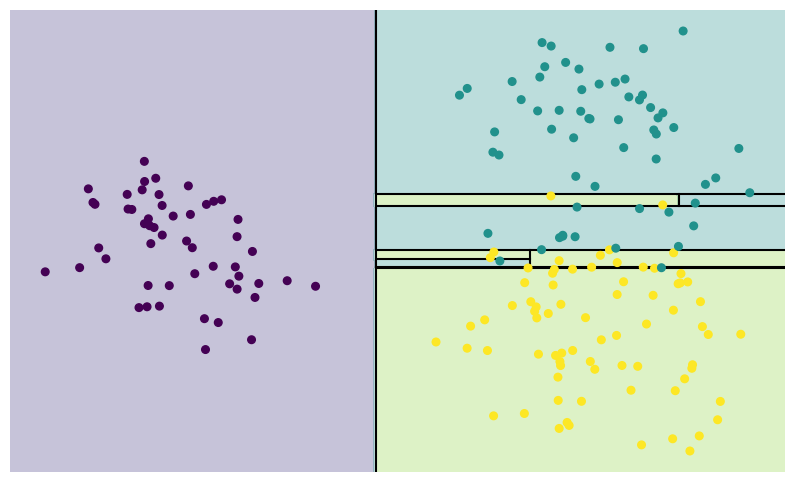

In [23]:
# Visualize the decision boundaries
fig, ax = plt.subplots(figsize=(10, 6))
visualize_tree_boundries(model, X_train, y_train, ax=ax)

#### Testing the model

In [24]:
# y_pred = ?
y_pred_sklearn_tree = model.predict(X_test)
print(accuracy_score(y_test, y_pred_sklearn_tree)*100)

93.82716049382715


c:\Users\Matth\Documents\PythonProjects\PyData2025\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


#### Confusion Matrix: identify which labels are predicted correctly and which are not


In [25]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_sklearn_tree)

array([[24,  0,  0],
       [ 0, 28,  3],
       [ 0,  2, 24]])

#### Repeat the process above with `DecisionTreeClassifier(max_depth=2)`

In [26]:
#Define and train the mode
model2 = DecisionTreeClassifier(max_depth=2)
#your code here - train the model with your training data
model2.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


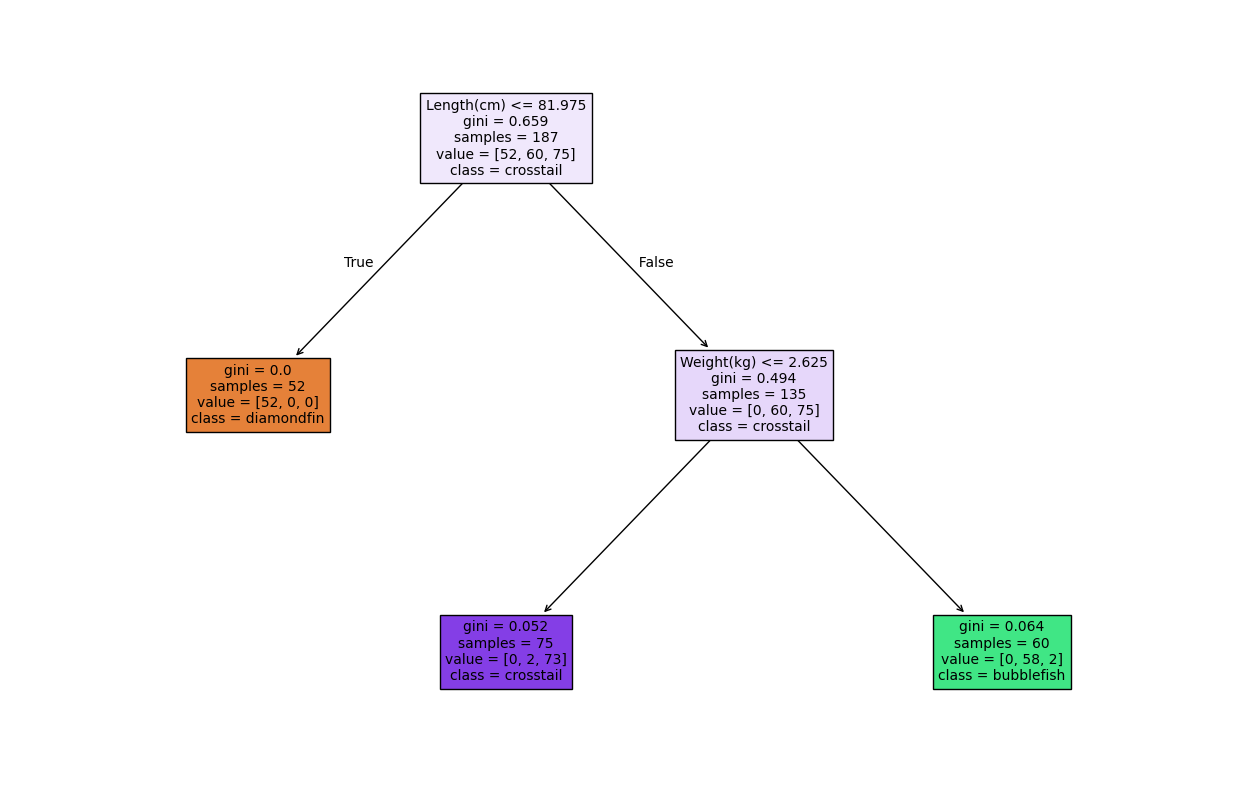

In [27]:
#visualize the decision tree diagram
plt.figure(figsize=(16,10))
plot_tree(model2, filled=True, feature_names=feature_names, class_names=target_names, fontsize=10)
plt.show()

c:\Users\Matth\Documents\PythonProjects\PyData2025\Lab_Week12_DecisionTree\util.py:42: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


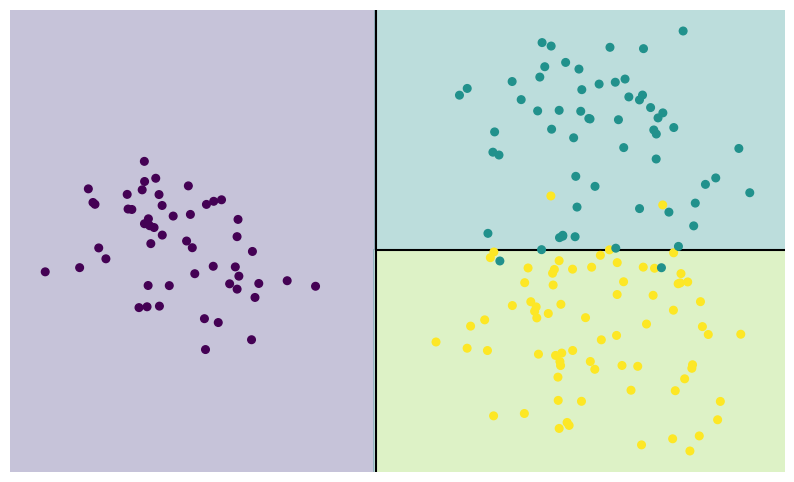

In [28]:
# visualize the decision boundaries
fig, ax = plt.subplots(figsize=(10, 6))
visualize_tree_boundries(model2, X_train, y_train, ax=ax)

In [ ]:
# validate the model with the test data; accuracy_score and confusion_matrix
y_pred_sklearn_tree2 = model2.predict(X_test)
print(accuracy_score(y_test, y_pred_sklearn_tree2)*100)
print(confusion_matrix(y_test, y_pred_sklearn_tree2))

96.29629629629629
[[24  0  0]
 [ 0 30  1]
 [ 0  2 24]]


c:\Users\Matth\Documents\PythonProjects\PyData2025\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


#### Find the optimal `max_depth` value for your model using a loop from 1 to 5

In [ ]:
# your code here
for i in range(1, 6):
    model_loop = DecisionTreeClassifier(max_depth=i)
    #your code here - train the model with your training data
    model_loop.fit(X_train, y_train)

    y_pred_sklearn_tree_loop = model_loop.predict(X_test)
    print(f"Accuracy for max_depth {i}: {accuracy_score(y_test, y_pred_sklearn_tree_loop)*100}%")
    print(f"Confusion matrix for max_depth {i}:\n {confusion_matrix(y_test, y_pred_sklearn_tree_loop)}")

Accuracy for max_depth 1: 61.72839506172839%
Confusion matrix for max_depth 1:
 [[24  0  0]
 [ 0  0 31]
 [ 0  0 26]]
Accuracy for max_depth 2: 96.29629629629629%
Confusion matrix for max_depth 2:
 [[24  0  0]
 [ 0 30  1]
 [ 0  2 24]]
Accuracy for max_depth 3: 96.29629629629629%
Confusion matrix for max_depth 3:
 [[24  0  0]
 [ 0 30  1]
 [ 0  2 24]]
Accuracy for max_depth 4: 92.5925925925926%
Confusion matrix for max_depth 4:
 [[24  0  0]
 [ 0 27  4]
 [ 0  2 24]]
Accuracy for max_depth 5: 93.82716049382715%
Confusion matrix for max_depth 5:
 [[24  0  0]
 [ 0 28  3]
 [ 0  2 24]]


### Practice Questions

 1.  What are the advantages and disadvantages of Decision Trees?
 2. What is the `confusion matrix` and how is it used?
 3. How do you `evaluate` the performance of a machine learning model?
 4. What is the purpose of `hyperparameter tuning`?